# Pandas - Group Data and Create Bar Plot


The following example creates a Pandas DataFrame object and then performs the following tasks.
- Group data based on a numeric attribute
- Apply various functions on the samples of each group for the attributes, e.g., count, sum, mean
- Create bar plots to show aggregate values for each group


#### The aggregate functions can be applied only to the numeric attributes. These functions will not work on the attributes of the type "object".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/zd/2ty0m0yn1jzc2zjgq1154kkxxmbbr2/T/ipykernel_35224/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DataFrame:            Style  Bed Rooms  Bath Rooms Backyard
0  Contemporary          2           1       No
1  Contemporary          3           2       No
2  Contemporary          2           1       No
3   Traditional          5           3      Yes
4   Traditional          6           4      Yes

Data types of each attribute: 
Style         object
Bed Rooms      int64
Bath Rooms     int64
Backyard      object
dtype: object

Sum of the values of each numeric attribute per 'Style' group:
              Bed Rooms  Bath Rooms
Style                              
Contemporary          7           4
Traditional          11           7

Mean of the values of each numeric attribute per 'Style' group:
              Bed Rooms  Bath Rooms
Style                              
Contemporary   2.333333    1.333333
Traditional    5.500000    3.500000

Number of samples of each attribute per 'Style' group:
              Bed Rooms  Bath Rooms  Backyard
Style                                        
Conte

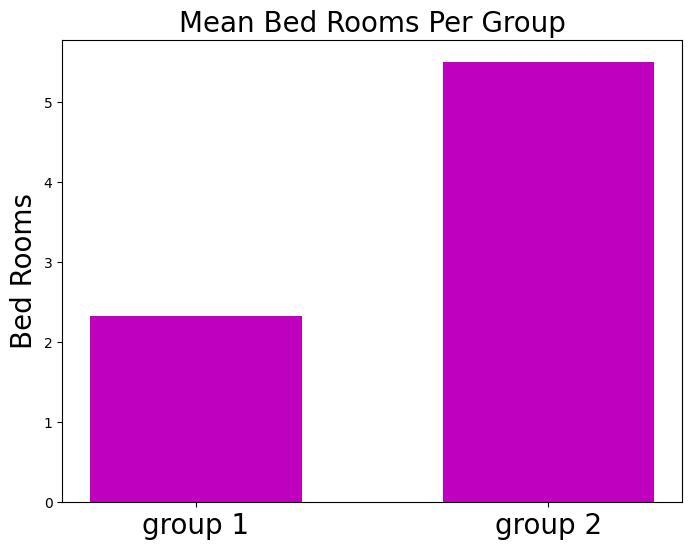

In [16]:
# Create a small toy DataFrame object for demonstration
df_test = pd.DataFrame({'Style': ['Contemporary', 'Contemporary','Contemporary', 'Traditional', 'Traditional'], 
                        'Bed Rooms': [2, 3, 2, 5, 6],
                        'Bath Rooms': [1, 2, 1, 3, 4],
                        'Backyard': ['No', 'No', 'No', 'Yes', 'Yes']})

print("DataFrame: ", df_test)
print("\nData types of each attribute: ")
print(df_test.dtypes)


# Group the data based on the "Style" attribute 
# Select only numeric columns, then compute the sum of the values of each attribute for all samples (rows) for each group
print("\nSum of the values of each numeric attribute per 'Style' group:")
print(df_test.groupby(['Style']).sum(numeric_only=True))

# Group the data based on the "Style" attribute 
# Select only numeric columns, then compute the mean of the values of each attribute for all samples (rows) for each group
print("\nMean of the values of each numeric attribute per 'Style' group:")
print(df_test.groupby(['Style']).mean(numeric_only=True))


# Group the data based on the "Style" attribute 
# Then, count the number of samples (rows) of each attribute for each group
print("\nNumber of samples of each attribute per 'Style' group:")
print(df_test.groupby(['Style']).count())


# Group the data based on the "Style" attribute 
# Then, count the number of samples (rows) of the 'Bed Rooms' attribute for each 'Style' group
print("\nNumber of samples of the 'Bed Rooms' attribute per 'Style' group:")
print(df_test.groupby(['Style']).count()['Bed Rooms'])


# Group the data based on the "Style" attribute 
# and count the number of samples (rows) of the 'Bed Rooms' attribute for each group
# Then, display only the count values
print("\nNumber of samples of the 'Bed Rooms' attribute per 'Style' group (only values):")
print(df_test.groupby(['Style']).count()['Bed Rooms'].values)


# Plot the mean bedrooms per 'Style' group using a matplotlib.pyplot bar plot
#groups = ['group 1', 'group 2'] # This list is used to create labels in the x-axis

groups = ['Contemporary', 'Traditional']  # Adjusted group labels to match the 'Style' column
group_list = np.arange(len(groups))  # Creates a list containing values [0, 1] for the x-axis


mean_bedrooms_per_group = df_test.groupby(['Style'])['Bed Rooms'].mean().values

plt.figure(figsize=(8, 6))
plt.bar(group_list, mean_bedrooms_per_group, color ='m', width = 0.6)
plt.title('Mean Bed Rooms Per Group', fontsize=20)
plt.ylabel('Bed Rooms', fontsize=20)
plt.xticks(range(len(groups)), groups, rotation=0, fontsize=20)
plt.show()




# Compute the mean number of bedrooms per 'Style' group
mean_bedrooms_per_group = df_test.groupby(['Style'])['Bed Rooms'].mean().values

# Check the content of mean_bedrooms_per_group
print("Mean bedrooms per group:", mean_bedrooms_per_group)

# Now, let's plot it
groups = ['Contemporary', 'Traditional']  # Adjusted group labels to match the 'Style' column
group_list = np.arange(len(groups))  # Creates a list containing values [0, 1] for the x-axis

plt.figure(figsize=(8, 6))
plt.bar(group_list, mean_bedrooms_per_group, color='m', width=0.6)
plt.title('Mean Bed Rooms Per Group', fontsize=20)
plt.ylabel('Bed Rooms', fontsize=20)
plt.xticks(group_list, groups, rotation=0, fontsize=20)
# plt.show()